In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
# final = pd.read_csv('test.csv') -- do not uncomment out

In [3]:
def does_does_not(cell):
    if cell >= 1:
        return 1
    else:
        return 0

def clean1(df):
    df.rename(columns= {col: col.lower().replace(' ','_') for col in df.columns}, inplace=True)
    
    df['deck_porch'] = df['wood_deck_sf'] + df['open_porch_sf'] + df['enclosed_porch'] + df['3ssn_porch'] + df['screen_porch']
    df['fence'] = df['fence'].notnull().astype('int')
    df['overall_cond_qual'] = df['overall_cond'] + df['overall_qual']
    
    df.drop([
    'alley', 'lot_frontage', 'mas_vnr_type', 'fireplace_qu', 'pool_qc', 'misc_feature',
    'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2',
    'bsmtfin_sf_2', 'bsmt_unf_sf', 'bsmt_full_bath', 'bsmt_half_bath',
    'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_area', 'garage_qual', 'garage_cond',
    'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
    'overall_cond', 'overall_qual'], axis=1, inplace=True)
        
    features_replace = ['pool_area' , 'garage_cars', 'fireplaces', 'total_bsmt_sf', 'mas_vnr_area', 'deck_porch']
    for i in features_replace:
        df[i] = df[i].map(does_does_not)
    
    df.rename(columns={
    'pool_area': 'has_pool',
    'garage_cars': 'has_garage', 
    'fireplaces': 'has_fireplace',
    'total_bsmt_sf': 'has_bsmt',
    'mas_vnr_area': 'has_mas_vnr',
    'fence': 'has_fence'}, inplace=True)
    
    return df.head()

In [4]:
clean1(df)

,id,pid,ms_subclass,ms_zoning,lot_area,street,lot_shape,land_contour,utilities,lot_config,...,has_pool,has_fence,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice,deck_porch,overall_cond_qual
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,3,2010,WD,Normal,130500,1,14
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,4,2009,WD,Normal,220000,1,12
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,2010,WD,Abnorml,109000,1,12
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2010,WD,Normal,174000,1,10
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,138500,1,14


# SAVE!!!

In [5]:
df['lot_shape'] =df['lot_shape'].replace({'IR3':'IR2'})
df['condition_1'] =df['condition_1'].replace({'PosA':'Pos', 'PosN':'Pos', 'RRAe':'RRe', 'RRNe':'RRe', 'RRNn':'RRn', 'RRAn':'RRn'})
df['condition_2'] =df['condition_2'].replace({'PosA':'Pos', 'PosN':'Pos', 'RRAe':'RRe', 'RRNe':'RRe', 'RRNn':'RRn', 'RRAn':'RRn'})
df['year_built'] = pd.to_datetime(df['year_built'], format='%Y')
df['year_remod/add'] = pd.to_datetime(df['year_remod/add'], format='%Y')
df['mo_sold'] = pd.to_datetime(df['mo_sold'], format='%m')
df['yr_sold'] = pd.to_datetime(df['yr_sold'], format='%Y')
df['exter_qual'] = df['exter_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['exter_cond'] = df['exter_cond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['heating_qc'] = df['heating_qc'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['electrical'] = df['electrical'].replace({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1})
df['kitchen_qual'] = df['kitchen_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

df.drop(['gr_liv_area', '2nd_flr_sf', 'bedroom_abvgr'], axis=1, inplace=True)

In [ ]:
# df['lot_shape'] =df['lot_shape'].replace({'IR3':'IR2'})
# df['condition_1'] =df['condition_1'].replace({'PosA':'Pos', 'PosN':'Pos', 'RRAe':'RRe', 'RRNe':'RRe', 'RRNn':'RRn', 'RRAn':'RRn'})
# df['condition_2'] =df['condition_2'].replace({'PosA':'Pos', 'PosN':'Pos', 'RRAe':'RRe', 'RRNe':'RRe', 'RRNn':'RRn', 'RRAn':'RRn'})
# df['year_built'] = pd.to_datetime(df['year_built'], format='%Y')
# df['year_remod/add'] = pd.to_datetime(df['year_remod/add'], format='%Y')
# df['mo_sold'] = pd.to_datetime(df['mo_sold'], format='%m')
# df['yr_sold'] = pd.to_datetime(df['yr_sold'], format='%Y')
# df['exter_qual'] = df['exter_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
# df['exter_cond'] = df['exter_cond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
# df['heating_qc'] = df['heating_qc'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
# df['electrical'] = df['electrical'].replace({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1})
# df['kitchen_qual'] = df['kitchen_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

# df.drop(['gr_liv_area', '2nd_flr_sf', 'bedroom_abvgr'], axis=1, inplace=True)

# df = pd.get_dummies(df, columns=['Neighborhood'], prefix=['n_'])

In [ ]:
# df[df.columns.difference(['B', 'D'])] -- might be the best way to select the features for the modeling

In [134]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'has_mas_vnr',
       'exter_qual', 'exter_cond', 'foundation', 'has_bsmt', 'heating',
       'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       'low_qual_fin_sf', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'has_fireplace', 'has_garage', 'paved_drive', 'has_pool', 'has_fence',
       'misc_val', 'mo_sold', 'yr_sold', 'sale_type', 'sale_condition',
       'saleprice', 'overall_cond_qual', 'deck_porch'],
      dtype='object')

In [7]:
df = pd.get_dummies(df, columns=[
    'neighborhood',
    'lot_shape',
    'ms_subclass',
    'ms_zoning',
    'land_contour',
    'lot_config',
    'utilities',
    'land_slope',
    'condition_1',
    'condition_2',
    'bldg_type',
    'exterior_1st',
    'exterior_2nd',
    'foundation',
    'heating',
    'central_air',
    'full_bath',
    'half_bath',
    'kitchen_abvgr',
    'functional',
    'paved_drive',
    'sale_type',
    'street',
    'house_style'
    
], prefix=[
    'n_',
    'ls_',
    'mssub_',
    'mszon_',
    'landcon_',
    'lotfig_',
    'ut_',
    'landm_',
    'cond1_',
    'cond2_',
    'btype_',
    'ext1_',
    'ext2_',
    'found_',
    'heat_',
    'ac_',
    'fb_',
    'hb_',
    'kita_',
    'funct_',
    'paved_',
    'stype_',
    'st_',
    'hstyle_'
      
])

### Dummies:
    Done:
    - neighborhood
    - lot_shape -- edited
    - ms_subclass
    - ms_zoning
    - land_contour
    - lot_config
    - utilities
    - land_slope
    - condition_1 and condition_2 -- edited
    - bldg_type
    - exterior_1st
    - exterior_2nd
    - foundation
    - heating
    - central_air
    - full_bath
    - half_bath
    - kitchen_abvgr
    - functional
    - paved_drive
    - sale_type

### Figure out what to do with:
    - street
    - house_style
    

In [11]:
df['house_style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

## Lot Shape

In [ ]:
df['lot_shape'].value_counts()

In [ ]:
df.groupby(['lot_shape'])['saleprice'].mean()

In [5]:
# if ir3 replace with ir2
df['lot_shape'] =df['lot_shape'].replace({'IR3':'IR2'})

In [6]:
df['lot_shape'].value_counts()

Reg    1295
IR1     692
IR2      64
Name: lot_shape, dtype: int64

In [11]:
print(df['lot_shape'].value_counts())

print('\n' , df.groupby(['lot_shape'])['saleprice'].mean())

print('\n' , df.groupby(['lot_shape'])['saleprice'].median())

Reg    1295
IR1     692
IR2      64
Name: lot_shape, dtype: int64

 lot_shape
IR1    211848.670520
IR2    228221.109375
Reg    162925.812355
Name: saleprice, dtype: float64

 lot_shape
IR1    190000
IR2    215500
Reg    145000
Name: saleprice, dtype: int64


### Land Contour

In [ ]:
df['land_contour'].value_counts()

In [ ]:
df.groupby(['land_contour'])['saleprice'].mean()

In [ ]:
df.groupby(['land_contour'])['saleprice'].median()

In [ ]:
# just get dummies on it

### Utilities

In [ ]:
df.columns

In [ ]:
# AllPub All public Utilities (E,G,W,& S)
# NoSewr Electricity, Gas, and Water (Septic Tank)
# NoSeWa Electricity and Gas Only
# ELO Electricity only

In [7]:
print(df['utilities'].value_counts())

print('\n' , df.groupby(['utilities'])['saleprice'].mean())

print('\n' , df.groupby(['utilities'])['saleprice'].median())

AllPub    2049
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64

 utilities
AllPub    181551.602245
NoSeWa    137500.000000
NoSewr     57625.000000
Name: saleprice, dtype: float64

 utilities
AllPub    162500
NoSeWa    137500
NoSewr     57625
Name: saleprice, dtype: int64


In [ ]:
# just get dummies

### Condition 1 and 2

In [10]:
print(df['condition_1'].value_counts())

print('\n' , df.groupby(['condition_1'])['saleprice'].mean())

print('\n' , df.groupby(['condition_1'])['saleprice'].median())

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: condition_1, dtype: int64

 condition_1
Artery    128765.000000
Feedr     143223.605505
Norm      185007.310130
PosA      254733.333333
PosN      254794.296296
RRAe      139685.714286
RRAn      172604.777778
RRNe      129616.666667
RRNn      198208.333333
Name: saleprice, dtype: float64

 condition_1
Artery    118950
Feedr     140000
Norm      167000
PosA      216000
PosN      214500
RRAe      142500
RRAn      167250
RRNe      126000
RRNn      184000
Name: saleprice, dtype: int64


In [14]:
print(df['condition_2'].value_counts())

print('\n' , df.groupby(['condition_2'])['saleprice'].mean())

print('\n' , df.groupby(['condition_2'])['saleprice'].median())

Norm      2025
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: condition_2, dtype: int64

 condition_2
Artery    119050.000000
Feedr     129181.818182
Norm      181382.075556
PosA      390666.666667
PosN      395666.666667
RRAe      190000.000000
RRAn      136905.000000
RRNn       96750.000000
Name: saleprice, dtype: float64

 condition_2
Artery    118000
Feedr     128000
Norm      163000
PosA      392000
PosN      385000
RRAe      190000
RRAn      136905
RRNn       96750
Name: saleprice, dtype: int64


In [15]:
df['condition_1'] =df['condition_1'].replace({'PosA':'Pos', 'PosN':'Pos', 'RRAe':'RRe', 'RRNe':'RRe', 'RRNn':'RRn', 'RRAn':'RRn'})
df['condition_2'] =df['condition_2'].replace({'PosA':'Pos', 'PosN':'Pos', 'RRAe':'RRe', 'RRNe':'RRe', 'RRNn':'RRn', 'RRAn':'RRn'})

### Overall Condition/Quality
moved to clean1

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: overall_qual, dtype: int64

 overall_qual
1      48725.000000
2      51081.000000
3      81309.103448
4     107744.037736
5     134963.644760
6     162891.102767
7     203430.285383
8     271437.044000
9     370197.376623
10    417396.565217
Name: saleprice, dtype: float64

 overall_qual
1      50150
2      57625
3      81400
4     106500
5     133500
6     160000
7     197900
8     267150
9     359900
10    450000
Name: saleprice, dtype: int64


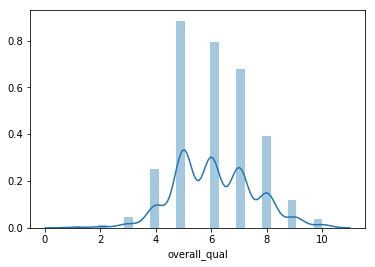

In [34]:
print(df['overall_qual'].value_counts())

print('\n' , df.groupby(['overall_qual'])['saleprice'].mean())

print('\n' , df.groupby(['overall_qual'])['saleprice'].median())

# plt.hist(df['house_style'])
sns.distplot(df['overall_qual'])

5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: overall_cond, dtype: int64

 overall_cond
1     59625.000000
2     65364.833333
3     99786.000000
4    114034.571429
5    207055.988870
6    148952.665761
7    155327.270370
8    155913.366337
9    198177.586207
Name: saleprice, dtype: float64

 overall_cond
1     61750.0
2     71750.0
3     91500.0
4    110479.5
5    187593.5
6    142500.0
7    142750.0
8    144000.0
9    161000.0
Name: saleprice, dtype: float64


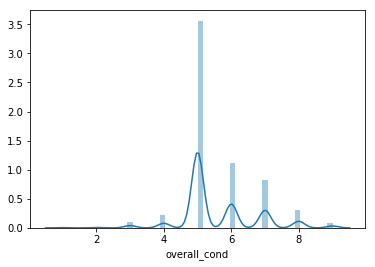

In [35]:
print(df['overall_cond'].value_counts())

print('\n' , df.groupby(['overall_cond'])['saleprice'].mean())

print('\n' , df.groupby(['overall_cond'])['saleprice'].median())

# plt.hist(df['house_style'])
sns.distplot(df['overall_cond'])

12    568
11    431
13    392
10    259
14    163
9      83
15     50
8      48
7      15
16     13
6      12
5       5
4       5
17      4
19      2
2       1
Name: new_column_for_testing, dtype: int64

 new_column_for_testing
2      61000.000000
4      52497.800000
5      56362.200000
6      60308.666667
7      95646.666667
8      95591.250000
9     114799.385542
10    134066.791506
11    151322.714617
12    179569.160211
13    228678.081633
14    271604.748466
15    294913.420000
16    230115.384615
17    231175.000000
19    400000.000000
Name: saleprice, dtype: float64

 new_column_for_testing
2      61000.0
4      63900.0
5      50000.0
6      64500.0
7      92900.0
8      89750.0
9     111000.0
10    132000.0
11    147000.0
12    177219.5
13    226250.0
14    268000.0
15    289500.0
16    234000.0
17    237450.0
19    400000.0
Name: saleprice, dtype: float64


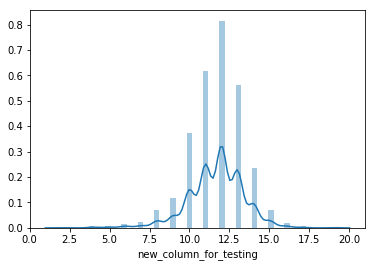

In [45]:
df['new_column_for_testing'] = df['overall_cond'] + df['overall_qual']



print(df['new_column_for_testing'].value_counts())

print('\n' , df.groupby(['new_column_for_testing'])['saleprice'].mean())

print('\n' , df.groupby(['new_column_for_testing'])['saleprice'].median())

sns.distplot(df['new_column_for_testing'])

In [131]:
df.rename(columns={'new_column_for_testing': 'overall_cond_qual'}, inplace=True)

In [133]:
df.drop(['overall_cond', 'overall_qual'], axis=1, inplace=True)

### Year build and year remod

In [53]:
df['year_built'] = pd.to_datetime(df['year_built'], format='%Y')

df['year_remod/add'] = pd.to_datetime(df['year_remod/add'], format='%Y')

### Roof Style and Matl

In [60]:
print(df['roof_style'].value_counts())

print('\n' , df.groupby(['roof_style'])['saleprice'].mean())

print('\n' , df.groupby(['roof_style'])['saleprice'].median())

# sns.distplot(df['roof_style'])

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: roof_style, dtype: int64

 roof_style
Flat       191613.076923
Gable      171264.253243
Gambrel    138208.333333
Hip        224366.654912
Mansard    152642.857143
Shed       208666.666667
Name: saleprice, dtype: float64

 roof_style
Flat       167000
Gable      159000
Gambrel    125250
Hip        180500
Mansard    150000
Shed       190000
Name: saleprice, dtype: int64


In [59]:
print(df['roof_matl'].value_counts())

print('\n' , df.groupby(['roof_matl'])['saleprice'].mean())

print('\n' , df.groupby(['roof_matl'])['saleprice'].median())

# sns.distplot(df['roof_matl'])

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
ClyTile       1
Membran       1
Name: roof_matl, dtype: int64

 roof_matl
ClyTile    160000.000000
CompShg    180849.197037
Membran    241500.000000
Tar&Grv    187948.933333
WdShake    264250.000000
WdShngl    339400.000000
Name: saleprice, dtype: float64

 roof_matl
ClyTile    160000
CompShg    161500
Membran    241500
Tar&Grv    167000
WdShake    287250
WdShngl    280000
Name: saleprice, dtype: int64


### Exterior Condition/Qual

In [68]:
print(df['exter_qual'].value_counts())

print('\n' , df.groupby(['exter_qual'])['saleprice'].mean())

print('\n' , df.groupby(['exter_qual'])['saleprice'].median())

3    1247
4     697
5      81
2      26
Name: exter_qual, dtype: int64

 exter_qual
2     89801.192308
3    143270.978348
4    230802.484935
5    374460.308642
Name: saleprice, dtype: float64

 exter_qual
2     83750
3    139400
4    217500
5    370967
Name: saleprice, dtype: int64


In [67]:
df['exter_qual'] = df['exter_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df['exter_cond'] = df['exter_cond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

### Heating

In [77]:
print(df['heating_qc'].value_counts())

print('\n' , df.groupby(['heating_qc'])['saleprice'].mean())

print('\n' , df.groupby(['heating_qc'])['saleprice'].median())

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

 heating_qc
Ex    216027.607512
Fa    117123.641791
Gd    160174.009404
Po     69033.333333
TA    138986.705193
Name: saleprice, dtype: float64

 heating_qc
Ex    197000
Fa    113500
Gd    153000
Po     87000
TA    134900
Name: saleprice, dtype: int64


In [78]:
df['heating_qc'] = df['heating_qc'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

### Electrical

SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: electrical, dtype: int64

 electrical
FuseA    122565.157143
FuseF    103678.914286
FuseP     83485.714286
Mix       67000.000000
SBrkr    187770.382227
Name: saleprice, dtype: float64

 electrical
FuseA    122875
FuseF    105000
FuseP     75000
Mix       67000
SBrkr    170000
Name: saleprice, dtype: int64


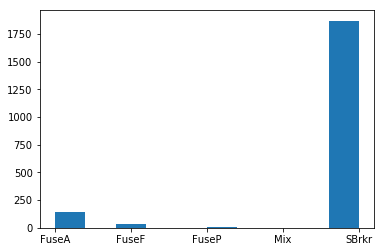

In [81]:
print(df['electrical'].value_counts())

print('\n' , df.groupby(['electrical'])['saleprice'].mean())

print('\n' , df.groupby(['electrical'])['saleprice'].median())

plt.hist(df['electrical']);

In [82]:
df['electrical'] = df['electrical'].replace({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1})
# rated poor, fair, average

### Floors

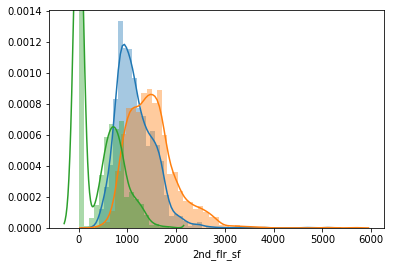

In [89]:
sns.distplot(df['1st_flr_sf'])
sns.distplot(df['gr_liv_area'])
sns.distplot(df['2nd_flr_sf'])

In [92]:
df.drop(['gr_liv_area', '2nd_flr_sf'], axis=1, inplace=True)

### Baths

In [93]:
print(df['full_bath'].value_counts())

print('\n' , df.groupby(['full_bath'])['saleprice'].mean())

print('\n' , df.groupby(['full_bath'])['saleprice'].median())

2    1096
1     900
3      45
0       8
4       2
Name: full_bath, dtype: int64

 full_bath
0    170226.000000
1    134870.961111
2    214600.614051
3    304609.155556
4    269500.000000
Name: saleprice, dtype: float64

 full_bath
0    149168.5
1    131700.0
2    196000.0
3    284700.0
4    269500.0
Name: saleprice, dtype: float64


### Kitchen

In [97]:
print(df['kitchen_abvgr'].value_counts())

print('\n' , df.groupby(['kitchen_abvgr'])['saleprice'].mean())

print('\n' , df.groupby(['kitchen_abvgr'])['saleprice'].median())

1    1960
2      88
0       2
3       1
Name: kitchen_abvgr, dtype: int64

 kitchen_abvgr
0    127500.000000
1    183722.951020
2    133367.886364
3    106000.000000
Name: saleprice, dtype: float64

 kitchen_abvgr
0    127500
1    165000
2    128050
3    106000
Name: saleprice, dtype: int64


In [98]:
print(df['kitchen_qual'].value_counts())

print('\n' , df.groupby(['kitchen_qual'])['saleprice'].mean())

print('\n' , df.groupby(['kitchen_qual'])['saleprice'].median())

TA    1047
Gd     806
Ex     151
Fa      47
Name: kitchen_qual, dtype: int64

 kitchen_qual
Ex    336424.463576
Fa    101334.957447
Gd    211629.451613
TA    139501.607450
Name: saleprice, dtype: float64

 kitchen_qual
Ex    325000.0
Fa    100000.0
Gd    200912.5
TA    136500.0
Name: saleprice, dtype: float64


In [99]:
df['kitchen_qual'] = df['kitchen_qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

### Rooms

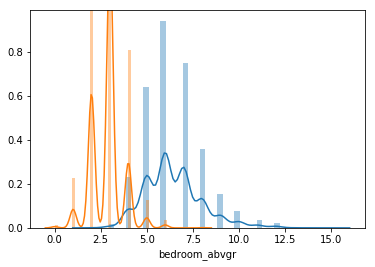

In [104]:
sns.distplot(df['totrms_abvgrd'])
sns.distplot(df['bedroom_abvgr'])
# drop bedrooms in favor of totrms

### Deck/Porch
added to clean1

In [111]:
print(df['wood_deck_sf'].value_counts())

print('\n' , df.groupby(['wood_deck_sf'])['saleprice'].mean().sort_values(ascending=False))

print('\n' , df.groupby(['wood_deck_sf'])['saleprice'].median().sort_values(ascending=False))

0       1075
100       53
144       46
192       43
120       40
168       36
140       23
224       17
160       14
143       13
240       12
216       12
200       10
264        8
280        8
208        8
108        8
156        8
48         8
132        7
196        7
112        7
136        7
128        7
210        7
188        7
252        7
182        6
203        6
158        6
        ... 
153        1
131        1
129        1
123        1
121        1
119        1
115        1
103        1
99         1
97         1
87         1
75         1
73         1
51         1
536        1
45         1
35         1
33         1
1424       1
870        1
736        1
728        1
684        1
668        1
646        1
586        1
576        1
550        1
546        1
394        1
Name: wood_deck_sf, Length: 322, dtype: int64

 wood_deck_sf
870    584500.000000
503    538000.000000
70     468000.000000
314    466500.000000
382    451950.000000
390    441929.000000
308    425000.000000

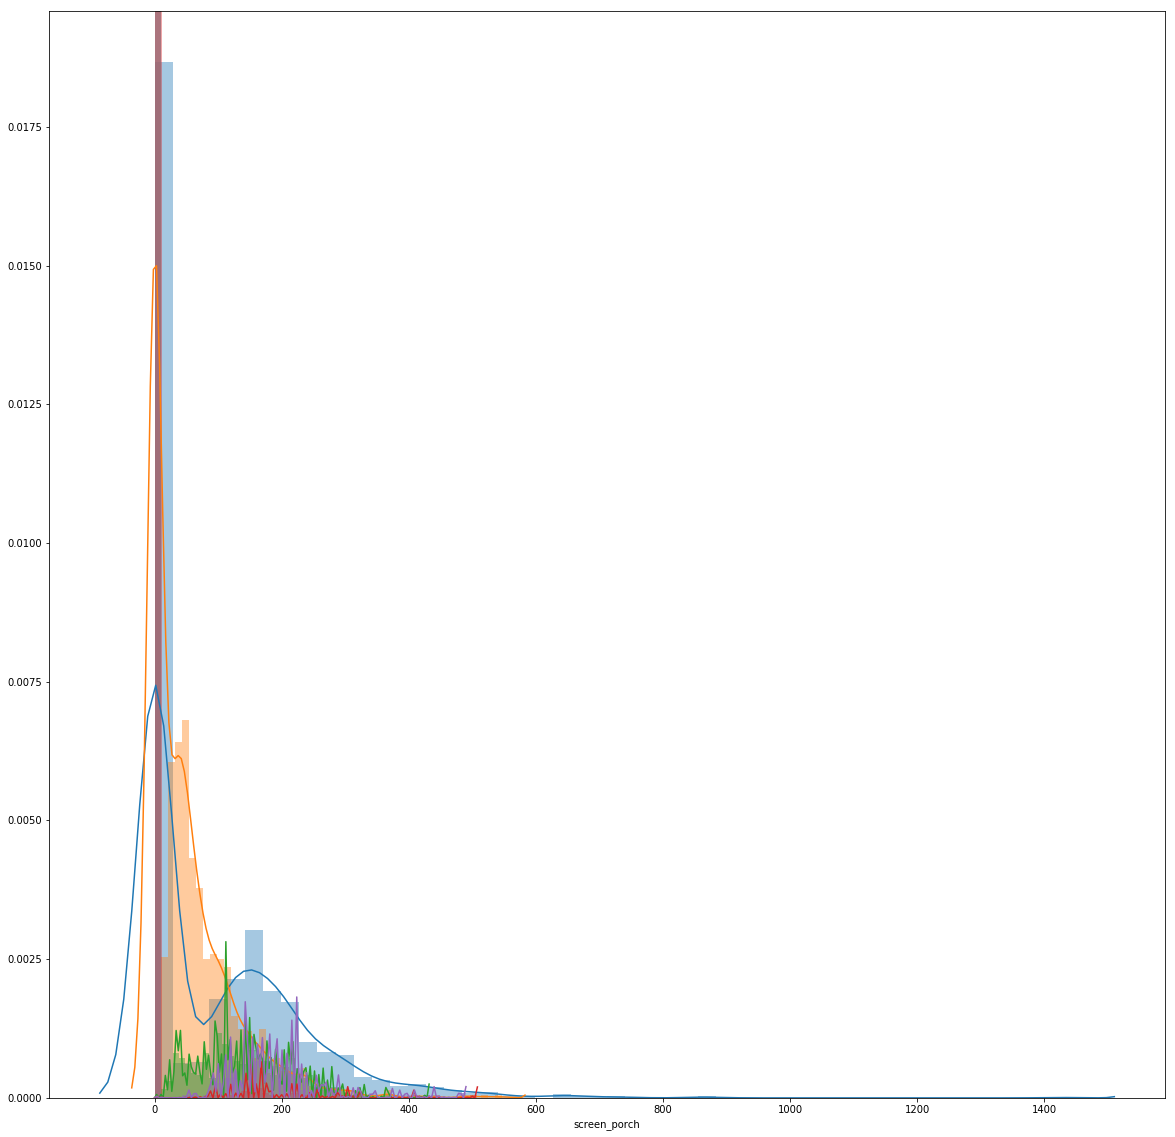

In [115]:
plt.figure(figsize=(20,20))
sns.distplot(df['wood_deck_sf'])
sns.distplot(df['open_porch_sf'])
sns.distplot(df['enclosed_porch'])
sns.distplot(df['3ssn_porch'])
sns.distplot(df['screen_porch'])

In [ ]:
# features_replace = ['pool_area' , 'garage_cars', 'fireplaces', 'total_bsmt_sf', 'mas_vnr_area']
# for i in features_replace:
#     df[i] = df[i].map(does_does_not)

In [117]:
df[['wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch']]

,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch
0,0,44,0,0,0
1,0,74,0,0,0
2,0,52,0,0,0
3,100,0,0,0,0
4,0,59,0,0,0
5,0,0,0,0,0
6,0,44,0,0,0
7,0,0,0,0,0
8,0,324,0,0,0
9,335,0,0,0,0


In [123]:
df['deck_porch'] = df['wood_deck_sf'] + df['open_porch_sf'] + df['enclosed_porch'] + df['3ssn_porch'] + df['screen_porch']

In [125]:
for i in ['deck_porch']:
        df[i] = df[i].map(does_does_not)

In [128]:
df.drop(['wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch'], axis=1, inplace=True)

### Year/Month Sold

In [129]:
df['mo_sold'] = pd.to_datetime(df['mo_sold'], format='%m')
df['yr_sold'] = pd.to_datetime(df['yr_sold'], format='%Y')

In [136]:
print(df['sale_type'].value_counts())

print('\n' , df.groupby(['sale_type'])['saleprice'].mean().sort_values(ascending=False))

print('\n' , df.groupby(['sale_type'])['saleprice'].median().sort_values(ascending=False))

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: sale_type, dtype: int64

 sale_type
New      279021.056250
Con      241807.500000
ConLI    207992.857143
CWD      186635.000000
WD       174912.251544
COD      133574.523810
ConLD    129091.352941
Oth      127497.750000
ConLw    124600.000000
Name: saleprice, dtype: float64

 sale_type
Con      261615
New      257558
CWD      160750
WD       158500
Oth      137050
ConLD    130000
COD      127500
ConLI    125000
ConLw     95000
Name: saleprice, dtype: int64
